In [17]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [18]:
DATA_FILES_DIR = './data/'
OUTPUT_CHARTS_DIR = './charts/'

if not os.path.exists(DATA_FILES_DIR):
    print(f'ERROR: cannot find dir {DATA_FILES_DIR}')
if not os.path.exists(OUTPUT_CHARTS_DIR):
    os.makedirs(OUTPUT_CHARTS_DIR)

# COVID-19 statistics in Italy

In [19]:
italy_region_data_cols = ['data', 'denominazione_regione', 'totale_ospedalizzati', 'totale_casi', 'deceduti', 'tamponi']      

italy_region = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv", 
                           usecols=italy_region_data_cols)
italy_region = italy_region.rename(columns={'data': 'Date', 'denominazione_regione': 'RegionName', 
                                            'totale_ospedalizzati': 'TotalHospitalizedPatients',
                                            'totale_casi': 'TotalPositiveCases', 'deceduti': 'Deaths', 
                                            'tamponi': 'TestsPerformed'})
italy_region['Date']= pd.to_datetime(italy_region['Date'])

In [20]:
first_date = italy_region['Date'].min()
last_date = italy_region['Date'].max()
print(f"Dates: {first_date} - {last_date}")
print(f'{italy_region.shape} samples, attributes')
italy_region.describe().T

Dates: 2020-02-24 18:00:00 - 2020-03-14 17:00:00
(420, 6) samples, attributes


,count,mean,std,min,25%,50%,75%,max
TotalHospitalizedPatients,420.0,149.880952,590.104485,0.0,1.0,7.5,53.5,5630.0
Deaths,420.0,16.561905,87.167731,0.0,0.0,0.0,2.0,966.0
TotalPositiveCases,420.0,286.673810,1079.915970,0.0,2.0,17.5,117.0,11685.0
TestsPerformed,420.0,1929.045238,4832.689287,0.0,42.0,268.0,1203.5,37138.0


In [21]:
from IPython.display import Markdown
Markdown("""
# Last Updated: {last_date}
""".format(last_date=last_date))


# Last Updated: 2020-03-14 17:00:00


In [22]:
# RegionName is irrelevant for the max statistics
italy_region[filter(lambda col : col != 'RegionName', italy_region.columns)].max()

Date                         2020-03-14 17:00:00
TotalHospitalizedPatients                   5630
Deaths                                       966
TotalPositiveCases                         11685
TestsPerformed                             37138
dtype: object

In [23]:
%timeit italy_region['RegionName'].nunique()
%timeit set(italy_region['RegionName'].values) # 10x faster!

136 µs ± 3.82 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
10.4 µs ± 237 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### Legend order
We want the legend to follow the descending order of the particular stat that we are charting (at last_date). 

In [24]:
# this is the order that we want for the stat TotalPositiveCases
italy_region[italy_region['Date']==last_date].sort_values(by='TotalPositiveCases', ascending=False)['RegionName']

408         Lombardia
404    Emilia Romagna
419            Veneto
409            Marche
411          Piemonte
415           Toscana
407           Liguria
406             Lazio
405     Friuli V. G. 
403          Campania
416            Trento
401           Bolzano
412            Puglia
414           Sicilia
399           Abruzzo
417            Umbria
402          Calabria
413          Sardegna
418     Valle d'Aosta
410            Molise
400        Basilicata
Name: RegionName, dtype: object

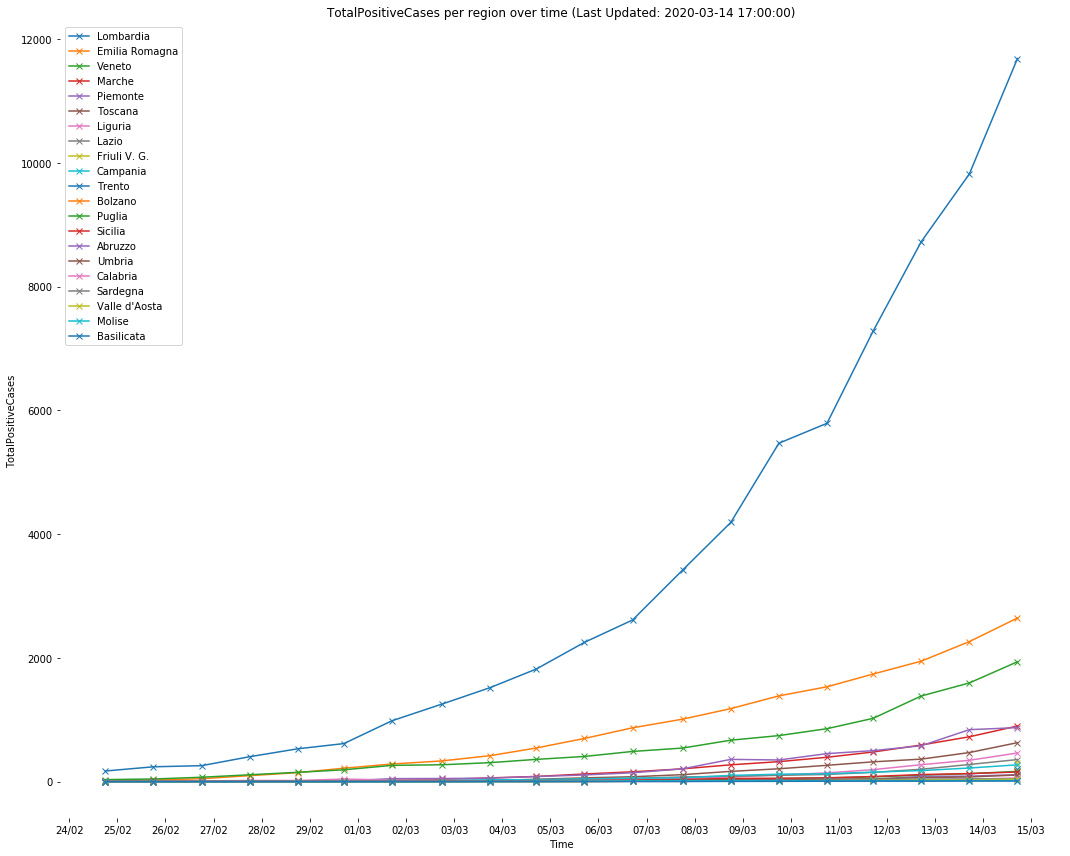

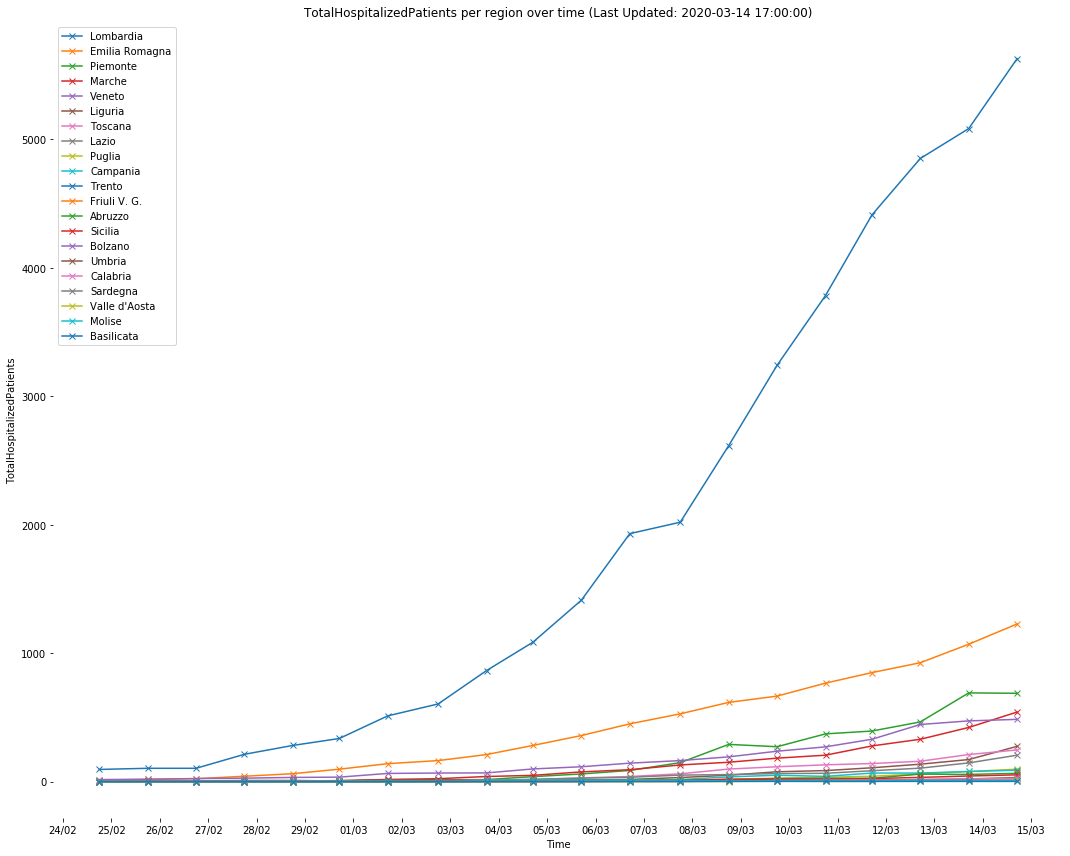

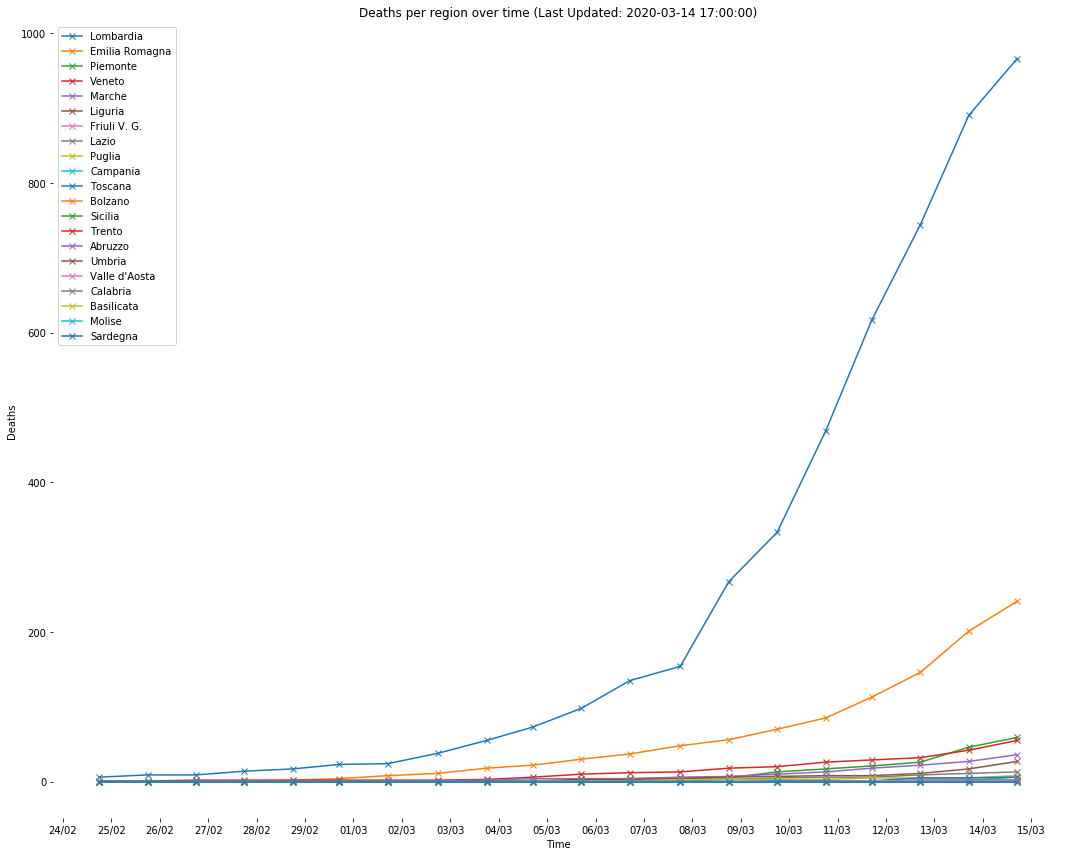

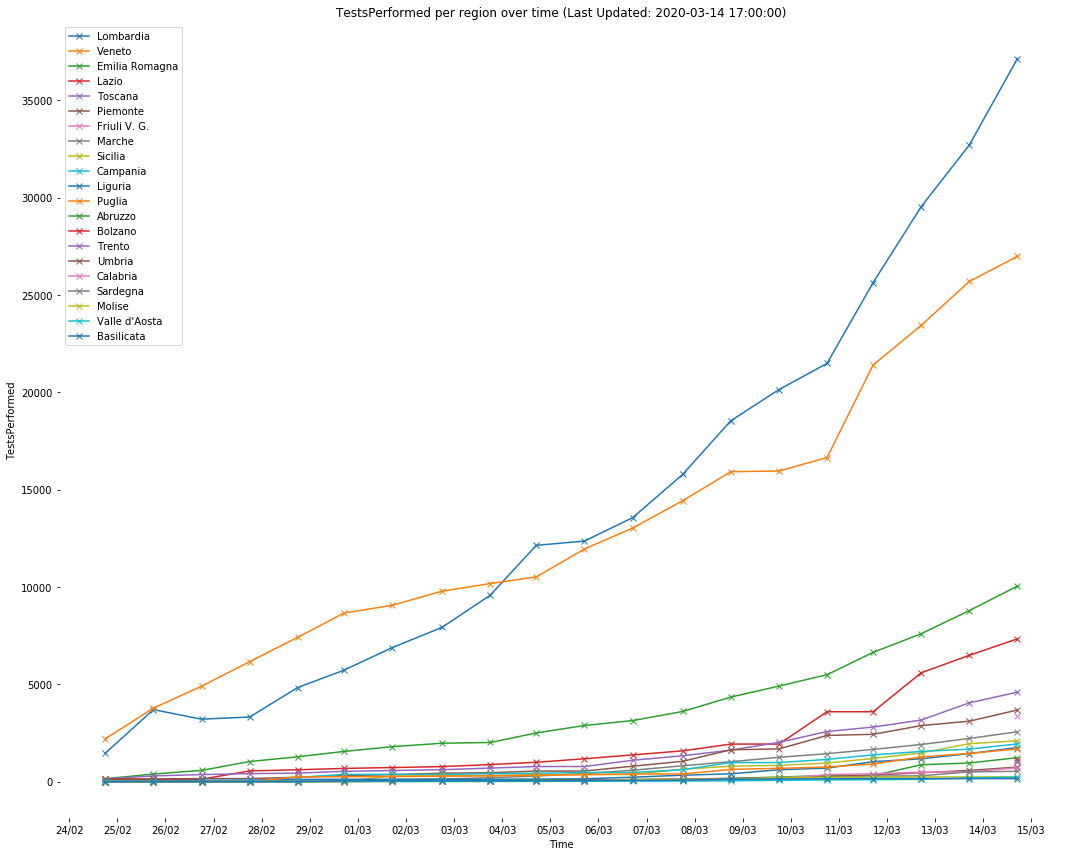

In [25]:
for stat in ['TotalPositiveCases', 'TotalHospitalizedPatients', 'Deaths', 'TestsPerformed']:
    plt.figure(figsize=(15, 12))
    for region in italy_region[italy_region['Date']==last_date].sort_values(by=stat, ascending=False)['RegionName']:
        plt.plot(italy_region[italy_region['RegionName'] == region]['Date'], 
                 italy_region[italy_region['RegionName'] == region][stat],
                 label=region,
                 marker='x')
    plt.xlabel('Time')
    plt.ylabel(f'{stat}')
    plt.title(f'{stat} per region over time (Last Updated: {last_date})')
    plt.legend()
    plt.box(False)
    plt.tight_layout()
    import matplotlib.dates as mdates
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
    plt.savefig(f'{OUTPUT_CHARTS_DIR}ita_region_{stat}.png', dpi=300)

In [26]:
italy_region_cluster_cols = ['data', 'denominazione_regione', 'totale_casi', 'lat', 'long']     

italy_region_cluster = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv", 
                                   usecols=italy_region_cluster_cols)
italy_region_cluster = italy_region_cluster.rename(columns={'data': 'Date', 'denominazione_regione': 'RegionName', 
                                            'totale_casi': 'TotalPositiveCases', 
                                            'lat': 'Latitude', 
                                            'long': 'Longitude'})
italy_region_cluster['Date'] = pd.to_datetime(italy_region_cluster['Date'])
italy_region_cluster = italy_region_cluster[italy_region_cluster['Date']==last_date]
italy_region_cluster

,Date,RegionName,Latitude,Longitude,TotalPositiveCases
399,2020-03-14 17:00:00,Abruzzo,42.351222,13.398438,112
400,2020-03-14 17:00:00,Basilicata,40.639471,15.805148,10
401,2020-03-14 17:00:00,Bolzano,46.499335,11.356624,173
402,2020-03-14 17:00:00,Calabria,38.109228,15.643453,60
403,2020-03-14 17:00:00,Campania,40.839566,14.250850,272
404,2020-03-14 17:00:00,Emilia Romagna,44.494367,11.341721,2644
405,2020-03-14 17:00:00,Friuli V. G.,45.649435,13.768136,301
406,2020-03-14 17:00:00,Lazio,41.892770,12.483667,357
407,2020-03-14 17:00:00,Liguria,44.411493,8.932699,463
408,2020-03-14 17:00:00,Lombardia,45.466794,9.190347,11685


In [27]:
import folium
# may require pip install folium
italy_map = folium.Map(location=[42.8719, 12.5674], zoom_start=5, tiles='Stamen Toner')

for region, lat, lon, count in zip(italy_region_cluster['RegionName'], italy_region_cluster['Latitude'], 
                                   italy_region_cluster['Longitude'], italy_region_cluster['TotalPositiveCases']):
    folium.CircleMarker([lat, lon],
                        radius=count/200,
                        color='red',
                        popup=f'RegionName: {region}<br>TotalPositiveCases: {count}<br>',
                        fill_color='red',
                        fill_opacity=0.7).add_to(italy_map)

italy_map

In [28]:
italy_province_cluster_cols = ['data', 'denominazione_regione', 'denominazione_provincia', 'totale_casi', 'lat', 'long']      

italy_province_cluster = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv", 
                                     usecols=italy_province_cluster_cols)
italy_province_cluster = italy_province_cluster.rename(columns={'data': 'Date', 'denominazione_regione': 'RegionName',
                                            'denominazione_provincia': 'ProvinceName',
                                            'totale_casi': 'TotalPositiveCases', 
                                            'lat': 'Latitude', 
                                            'long': 'Longitude'})
italy_province_cluster['Date'] = pd.to_datetime(italy_province_cluster['Date'])
italy_province_cluster = italy_province_cluster[(italy_province_cluster['Date']==last_date) & 
                                                 (italy_province_cluster['Latitude']!=0.0) &
                                                 (italy_province_cluster['TotalPositiveCases']!=0.0)]
italy_province_cluster.sort_values(by='TotalPositiveCases', ascending=False)[:20]

,Date,RegionName,ProvinceName,Latitude,Longitude,TotalPositiveCases
2480,2020-03-14 17:00:00,Lombardia,Bergamo,45.694414,9.668425,2864.0
2481,2020-03-14 17:00:00,Lombardia,Brescia,45.539931,10.219103,2122.0
2483,2020-03-14 17:00:00,Lombardia,Cremona,45.133367,10.024209,1565.0
2487,2020-03-14 17:00:00,Lombardia,Milano,45.466794,9.190347,1551.0
2485,2020-03-14 17:00:00,Lombardia,Lodi,45.314407,9.503721,1276.0
2459,2020-03-14 17:00:00,Emilia Romagna,Piacenza,45.051935,9.692633,853.0
2489,2020-03-14 17:00:00,Lombardia,Pavia,45.185093,9.160157,622.0
2553,2020-03-14 17:00:00,Veneto,Padova,45.406930,11.876087,611.0
2497,2020-03-14 17:00:00,Marche,Pesaro e Urbino,43.910140,12.913460,591.0
2458,2020-03-14 17:00:00,Emilia Romagna,Parma,44.801074,10.328350,570.0


In [29]:
italy_map = folium.Map(location=[42.8719, 12.5674], zoom_start=5, tiles='Stamen Toner')

for region, province, lat, lon, count in zip(italy_province_cluster['RegionName'], 
                                             italy_province_cluster['ProvinceName'],
                                             italy_province_cluster['Latitude'], 
                                             italy_province_cluster['Longitude'], 
                                             italy_province_cluster['TotalPositiveCases']):
    folium.CircleMarker([lat, lon],
                        radius=count/200,
                        color='red',
                        popup=f'RegionName: {region}<br>ProvinceName: {province}<br>TotalPositiveCases: {count}<br>',
                        fill_color='red',
                        fill_opacity=0.7).add_to(italy_map)

italy_map